# **Machine Learning Pipeline for Aircraft Price Prediction**

### **Submitted by:** Aditya Rautela

### **Student Number:** GH1033598

### **Programme:** MSc Data Science, AI, and Digital Business

### **Submitted to:** Dr. Mohammad Madhavi

#**Business Context**

A company called "XYZ.Ltd" is a new player in the aviation industry. It has been operating for the past 5 years in the private jet and fly-your-plane category.

From their first day of operation, they were operating the flights which were a part of the fleet owned by "ABC.Ltd" (A leader in the aviation industry) as a lease contract.

Now as of March 2025, XYZ is nearing the end of their short-term contract. They plan to built a strong build for themselves before July 2025.

Now to get some insights about the ideal price point for the planes for their fleet they have come to our firm for data analysis and prediction about the best price for their fleet.

For the analysis they have created a dataset with **517 entries** with complete data about the aircrafts (model_name, engine_type, engine_power, max_speed, cruise_speed, stall_speed, fuel_tank, all_eng_roc, out_eng_roc, takeoff_distance, landing_distance, empty_weight, length, wing_span, range and price)


#**Objective**

As a data scientist we have the following objectives:

a. To get insightful inferences about the data.

b.Explore, clean, and interpret the data for the client to maximise the value that can be generated.

c. Evaluting and presenting the data in a way that the client can get the best insights about the available inventory.

#**Data Source**

To attain the data set I have used Kaggle and the link for the data set is listed below:

https://www.kaggle.com/datasets/mehmet0sahinn/aircraft-price-analysis-and-prediction-dataset


#**Importing libraries and dataset**

To gain insights into the data and to explore, clean, and visualise data we need to import certain libraries and also the data set we are going to perform out operations.

We also need certain libraires to utilise machine learning algorithums.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("aircraft_price.csv")
df.head()

,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,303.0,449.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,247.0,433.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,257.0,420.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,257.0,420.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,257.0,420.0,175.0,1250000.0


#**Dropping model column**

For the above dataset model name doesn't provide much of value to us for the analysis and modeling part, thus we will drop the model column.

In [ ]:
df_alpha = df.drop('model_name', axis=1)
df_alpha.head()

,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,303.0,449.0,370.0,1300000.0
1,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,247.0,433.0,190.0,1230000.0
2,Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,257.0,420.0,210.0,1600000.0
3,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,257.0,420.0,210.0,1300000.0
4,Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,257.0,420.0,175.0,1250000.0


In [ ]:
df_alpha.shape

(517, 15)

#**Splitting the dataset into train, validate and test dataset**

Now to prevent our data from any type of leakage and misinterpretation we will split our data into train, validate and test set. This will further help us to increase our overall accruacy score.

Now to attain maximum insights from out train dataset we will use the ideal situation of spliting the data set in the following ratio, train set is given 80%, while the other two validate and test are 10% each.

Source for the code: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
df_alpha_train, df_alpha_test = sklearn.model_selection.train_test_split(df_alpha, train_size=0.8, test_size=0.20)

df_alpha_test, df_alpha_val = sklearn.model_selection.train_test_split(df_alpha_test, test_size=0.50)

print(df_alpha.shape)

print(df_alpha_train.shape)
print(df_alpha_val.shape)
print(df_alpha_test.shape)

(517, 15)
(413, 15)
(52, 15)
(52, 15)


#**Data Exploration**

Now lets try to learn some of the important elements of our dataset.

Through this we will get to know the categorical and numerical values in our data set.

In [ ]:
df_alpha_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 458 to 202
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_type       413 non-null    object 
 1   engine_power      413 non-null    float64
 2   max_speed         413 non-null    float64
 3   cruise_speed      413 non-null    float64
 4   stall_speed       413 non-null    float64
 5   fuel_tank         413 non-null    float64
 6   all_eng_roc       413 non-null    float64
 7   out_eng_roc       413 non-null    float64
 8   takeoff_distance  413 non-null    float64
 9   landing_distance  413 non-null    float64
 10  empty_weight      413 non-null    float64
 11  length            413 non-null    float64
 12  wing_span         413 non-null    float64
 13  range             413 non-null    float64
 14  price             404 non-null    float64
dtypes: float64(14), object(1)
memory usage: 51.6+ KB


### Check for all the unique values in our data set

It is important to know all the unique values which are stated in our dataset to know the different categories which are crusial in our data set for analysis.

This will help us know the diversity in out data set.

In [ ]:
df_alpha_train.nunique()

,0
engine_type,3
engine_power,102
max_speed,189
cruise_speed,173
stall_speed,68
fuel_tank,154
all_eng_roc,232
out_eng_roc,241
takeoff_distance,211
landing_distance,184


From the above analysis we got to know that there are only 3 engine types in our dataset, so lets try to know the distribution of these engine type in out data set and know which one are more prefered.

Source for the code: https://seaborn.pydata.org/generated/seaborn.countplot.html

engine_type
engine_type
Piston     312
Jet         60
Propjet     41
Name: count, dtype: int64


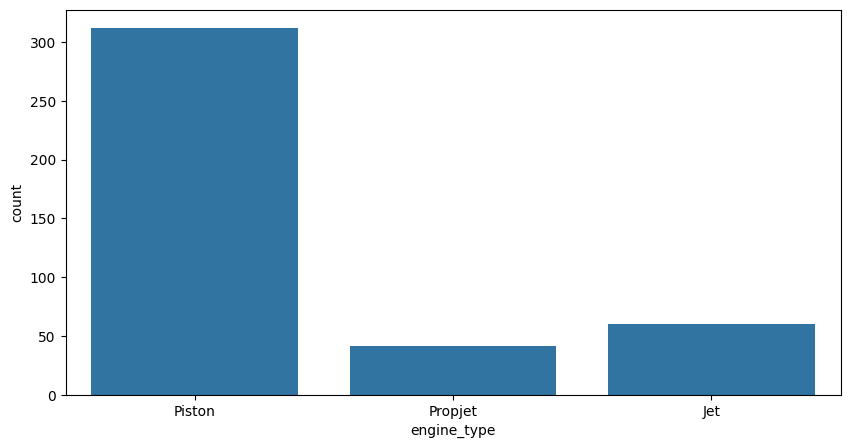

In [ ]:
for col in df_alpha_train.columns:
  if df_alpha_train[col].dtype == 'object':
    print(col)
    print(df_alpha_train[col].value_counts())

    plt.figure(figsize=(10,5))
    sns.countplot(data=df_alpha_train, x=col)
    plt.show()

Here we knew that for the industry **piston** engine type is highly prefered while jet and propjet engine type are less prefered. But this might be due to certain reason lets try to explore that.

Source for the code: https://seaborn.pydata.org/generated/seaborn.barplot.html

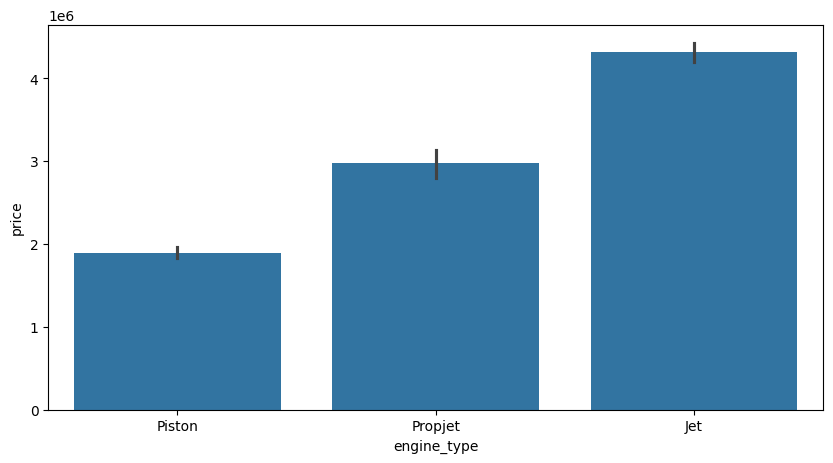

In [ ]:
df_alpha_train.groupby('engine_type')['price'].mean()

plt.figure(figsize=(10,5))
sns.barplot(data=df_alpha_train, x='engine_type', y='price')
plt.show()

Through this it is quiet clear that one of the key element **price** which is a very important element for our analysis as our client is a **new entrant** in the industry and price is a crucial factor for them to make any decision.

###Now let's see the distribution of data through graphs



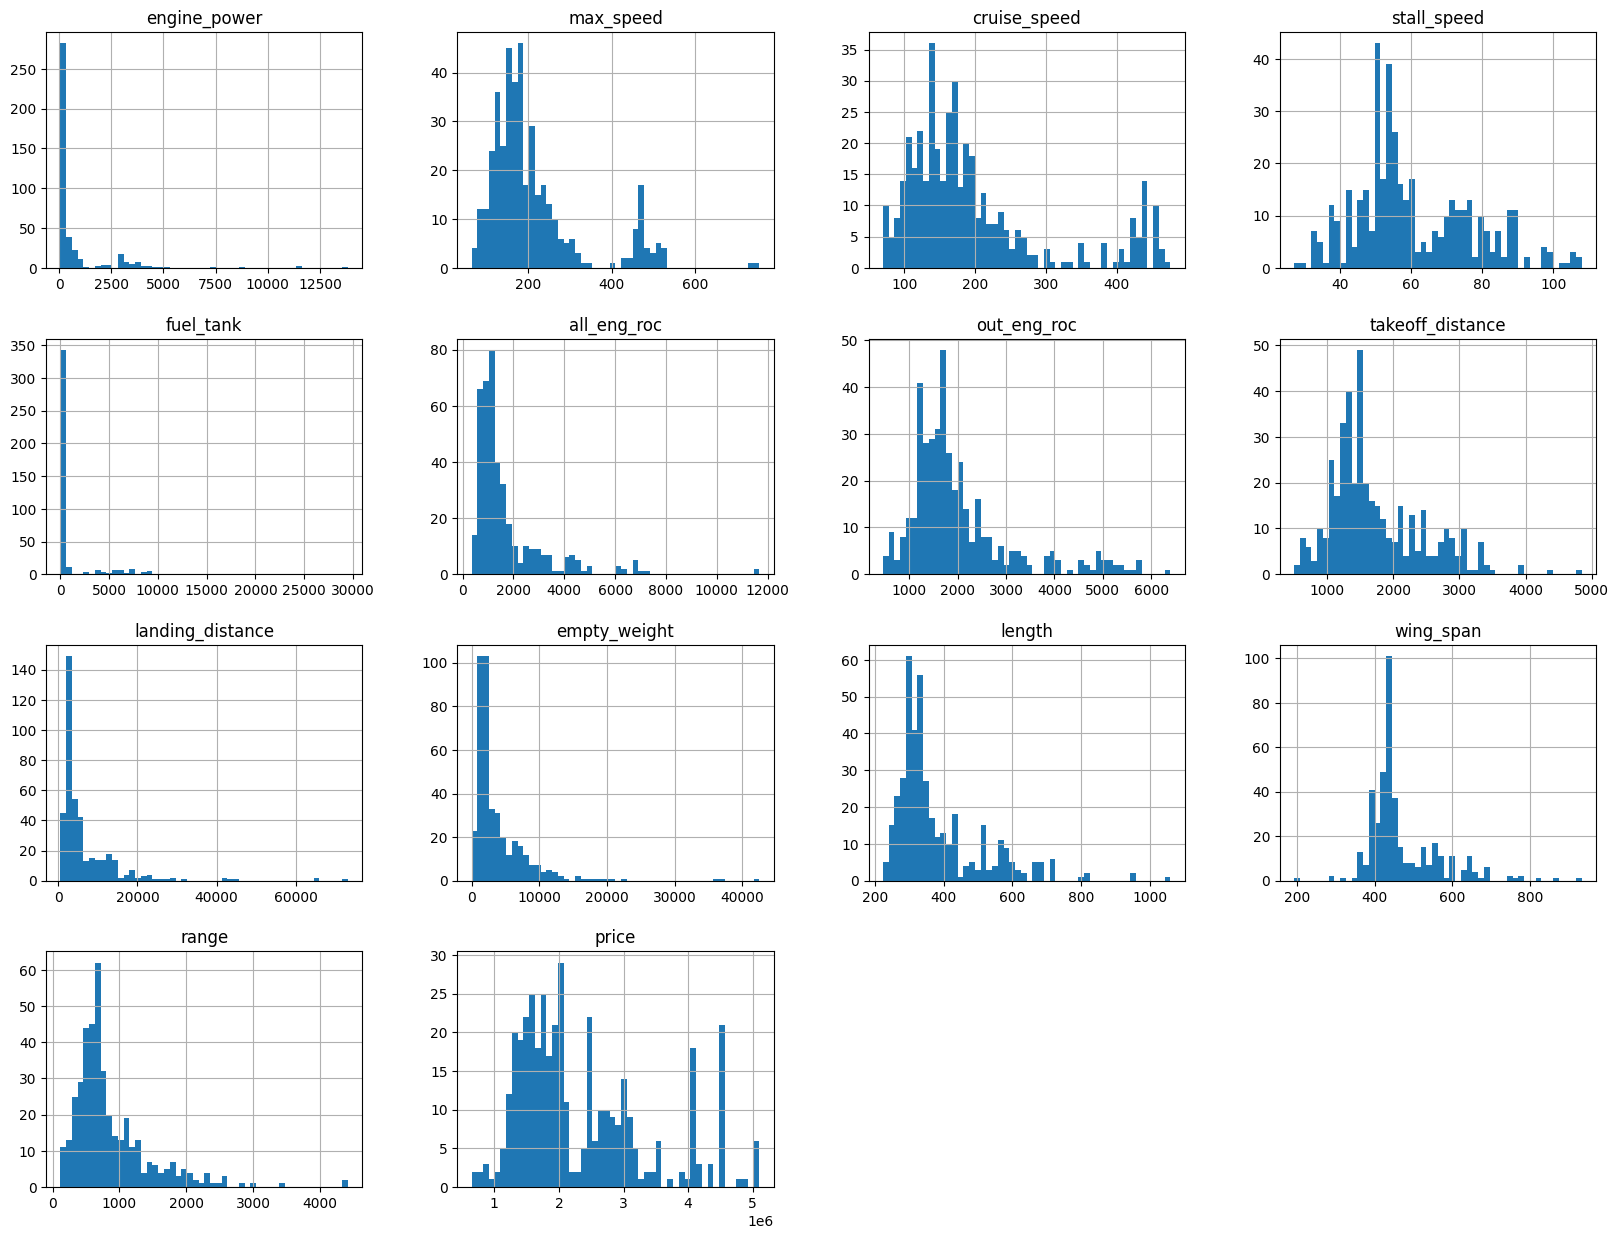

In [ ]:
df_alpha_train.hist(bins=50, figsize=(20,15))
plt.show()

Through this distribution we got to know that other than price, most of the data is inclinded towards **left**. Which reflects that most of the aircraft have simpler and low specification and are meant for basic operations.

#**Checking for any missing or null values**

Null values in a dataset may create a problem in model training and analysis. Thus it is important to either remove or impute some values for those values.

In [ ]:
df_alpha_train.isnull().sum()

,0
engine_type,0
engine_power,0
max_speed,0
cruise_speed,0
stall_speed,0
fuel_tank,0
all_eng_roc,0
out_eng_roc,0
takeoff_distance,0
landing_distance,0


For our dataset, there are some missing values in the price column.

Since price is a crucial element for our analysis, we need to impute some values for our missing values so that the imputed values may help us gain some crucial inferences about the data.

Since for the column, mean of price is ideal as it gives us an idea about the central tendacy of the dataset and thus has minimum biasness.

Source for the code: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_alpha_train['price'] = imputer.fit_transform(df_alpha_train[['price']])

df_alpha_val['price'] = imputer.transform(df_alpha_val[['price']])

df_alpha_test['price'] = imputer.transform(df_alpha_test[['price']])

In [ ]:
df_alpha_train.isnull().sum()

,0
engine_type,0
engine_power,0
max_speed,0
cruise_speed,0
stall_speed,0
fuel_tank,0
all_eng_roc,0
out_eng_roc,0
takeoff_distance,0
landing_distance,0


## **Checking for any duplicate values**

We will have check if there any duplicate values.

Which in our case there are no duplicate values.

In [ ]:
df_alpha_train.duplicated().sum()

np.int64(0)

#**Heatmap**

Now to learn more about the correlation amonst all the features we are going to createa a heatmap of the data set.

Source for the code: https://seaborn.pydata.org/generated/seaborn.heatmap.html

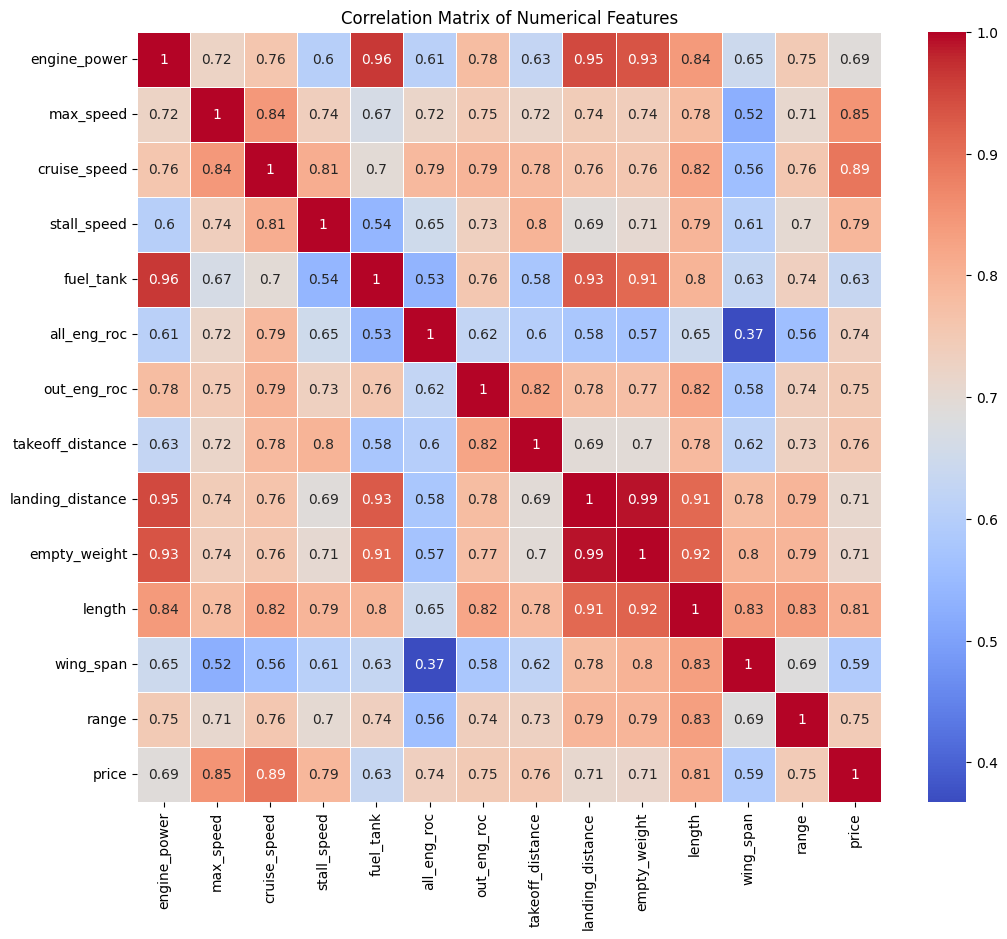

In [ ]:
numerical_features = df_alpha_train.select_dtypes(include=('number'))

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Through this graph we learned that in an aircraft each and every element are highly correlated with each other and any change in any of these factor will impact the overall dynamics of the plane.

Thus for the organisation looking for a new aircraft must first define their price point to enter in the market and thus make fruitful decision.

**Now to let's help the clients to predict the ideal price to enter so as they may perform their further steps.**

Source for the code: https://seaborn.pydata.org/generated/seaborn.boxplot.html

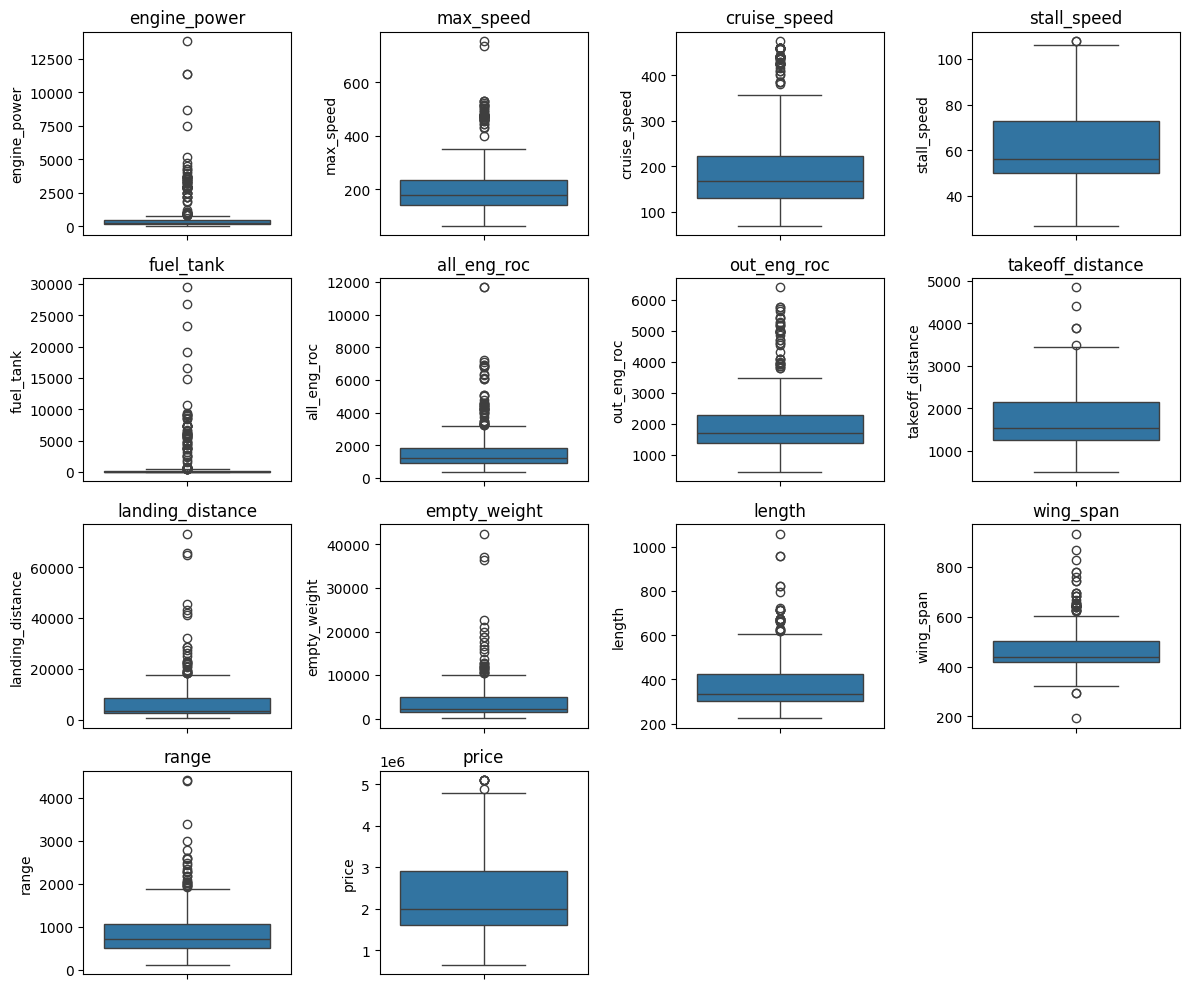

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(df_alpha_train.select_dtypes(include=np.number).columns):
  plt.subplot(4, 4, i + 1)
  sns.boxplot(y=df_alpha_train[column])
  plt.title(column)

plt.tight_layout()
plt.show()


For our dataset there are some of the underlying outliers. But we know that plans across the globe are meant for different purpose and are differently designed based on there power, length, landing and takeoff distance,etc. based on their manufacturer, purpose and use and many other features which makes each and every elements and specification about an aircraft crusial for the analysis. Thus to remove any underliying impact by removing such outliers from our dataset we will not **remove any outliers**. So that the analysis takes ground of each and every dimension about and aircraft.

#**Data Preprocessing**

Let's preprocess our data starting up with classifying which column is categorical and which column is numerical.

Source for the code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
categorical = df_alpha_train.select_dtypes(include=['object']).columns
numerical = df_alpha_train.select_dtypes(include=['float64']).columns

print(categorical)
print(numerical)

Index(['engine_type'], dtype='object')
Index(['engine_power', 'max_speed', 'cruise_speed', 'stall_speed', 'fuel_tank',
       'all_eng_roc', 'out_eng_roc', 'takeoff_distance', 'landing_distance',
       'empty_weight', 'length', 'wing_span', 'range', 'price'],
      dtype='object')


#**Feature Transforming**



Now let's seprate out **target lable and feature vector**.
We seprate these two elements to classify our input and output value. This will help us to learn the desired relationship between input and output.

In [ ]:
x_train = df_alpha_train.drop("price", axis = 1)
y_train = df_alpha_train['price']

x_val = df_alpha_val.drop("price", axis = 1)
y_val = df_alpha_val['price']

x_test = df_alpha_test.drop("price", axis = 1)
y_test = df_alpha_test['price']

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(413, 14)
(413,)
(52, 14)
(52,)
(52, 14)
(52,)


Now to perform our model training we need to convert our features into numerical value so that they can fit in the machine learning model. For this process we will be using **Onehot encoding**.

Source for the code: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [ ]:
numerical_features = x_train.select_dtypes(include=np.number).columns
categorical_features = x_train.select_dtypes(include='object').columns

column_transform = sklearn.compose.ColumnTransformer(
    [
        ('scaling', sklearn.preprocessing.StandardScaler(), numerical_features),
        ('encoding', sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

column_transform.fit(x_train)
x_train = column_transform.transform(x_train)
x_val = column_transform.transform(x_val)
x_test = column_transform.transform(x_test)

print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_val:", x_val.shape)
print("shape of y_val:", y_val.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (413, 16)
shape of y_train: (413,)
shape of x_val: (52, 16)
shape of y_val: (52,)
shape of x_test: (52, 16)
shape of y_test: (52,)


#**Model Implementation**

Now for our dataset we have a well labeled data with us which means that through out data set we can know the relationship between input and output. Thus for this reason we are using **supervised learning** technique which offers evaluation and prediction accuracy for our targeted ourcome.

Now let's implement the ideal machine learning model for our data set.

Here are the bunch of different technique and models for our data set and through the R-squared matrix we are going to check which model suits our data set the most and what is score we get from it.


In [ ]:
best_model = sklearn.linear_model.LinearRegression()

best_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = best_model.predict(x_test)

r_squared = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R-squared on the test set: {r_squared}")

mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE) on the test set: {mae}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse}")

R-squared on the test set: 0.8325486809291938
Mean Absolute Error (MAE) on the test set: 278536.96219320764
Root Mean Squared Error (RMSE) on the test set: 402231.4323554531


In [ ]:
best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = best_model.predict(x_test)
r_squared = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R-squared on the test set: {r_squared}")

R-squared on the test set: 0.8253900492538082


In [ ]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = best_model.predict(x_test)
r_squared = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R-squared on the test set: {r_squared}")

R-squared on the test set: 0.8602524354576743


In [ ]:
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = best_model.predict(x_test)
r_squared = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R-squared on the test set: {r_squared}")

R-squared on the test set: 0.910478231838445


##**Model interpretation**

Now using Gradient Boosting Regressor we are able to attain almost 91% of our accuracy in our test set.
Which means that the model is a strong fit and align with the actual data.

##**Strength of the solution**

1. This analysis helps us understand that engine type is a highly influencial factor to make any price based decision.

2. The heatmpa in the analysis helps us understand verious features which can be crucial while determining the price and purchase of an aircraft.

3. The Gradient Boosting Regressor gave a higher accuracy for the price prediction task.

##**Limitation of the solution**

1. The model's performance is sensitive to changes, mainly because of high inter-relation amongst the features which, due to any change may impact the overall model's accuracy.

2. Limited availability of data set is a key issue here. We have a limited set of information about of bunch of aircrafts. With any new addition in the market the model might be impacted.


##**Business Implication**

1. With the above data analysis, XYZ Ltd. can gain an upper hand in the aviation market by making optimal investment decision at the correct time to leverage more and more profits for their firm.

2. By countering sudden price inflation and changes XYZ Ltd. can hinder any sudden and unwanted changes in the market.

3. While making any decision negotiation and price setting can be easily made.